In [1]:
from pathlib import Path
from typing import Literal

import geopandas as gpd
import matplotlib.pyplot as plt

## Load input layers


In [2]:
sufosat: gpd.GeoDataFrame = gpd.read_file("../data/sufosat/sufosat_clear_cuts_2024.fgb")
sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry
0,2024-04-21,2024-07-08,78,12,0.500123,"MULTIPOLYGON (((1242170.295 6021778.341, 12421..."
1,2024-03-04,2024-04-21,48,19,1.386440,"MULTIPOLYGON (((1233121.944 6028390.495, 12331..."
2,2024-06-20,2024-07-14,24,7,0.617602,"MULTIPOLYGON (((1198216.849 6067996.198, 11982..."
3,2024-04-08,2024-07-25,108,51,2.102984,"MULTIPOLYGON (((1163543.691 6133084.278, 11635..."
4,2024-05-26,2024-07-14,49,6,0.509373,"MULTIPOLYGON (((1188128.497 6151090.369, 11881..."
...,...,...,...,...,...,...
11661,2024-03-11,2024-05-22,72,15,0.571641,"MULTIPOLYGON (((322563.449 6225453.651, 322563..."
11662,2024-04-10,2024-06-03,54,21,1.025675,"MULTIPOLYGON (((320038.024 6221675.317, 320038..."
11663,2024-05-10,2024-05-22,12,4,0.532672,"MULTIPOLYGON (((313513.415 6220771.654, 313514..."
11664,2024-02-28,2024-06-27,120,80,4.974293,"MULTIPOLYGON (((325514.216 6204393.711, 325514..."


In [3]:
natura2000: gpd.GeoDataFrame = gpd.read_file("../data/natura2000").rename(
    columns={"Couches": "type", "SITECODE": "code", "SITENAME": "name"}
)[["type", "name", "geometry"]]
natura2000

,type,name,geometry
0,ZPS,Etang de Saint Quentin,"POLYGON ((627623.168 6854888.067, 627620.379 6..."
1,ZPS,Massif de Fontainebleau,"MULTIPOLYGON (((686304.526 6806792.984, 686243..."
2,ZPS,Massif de Villefermoy,"MULTIPOLYGON (((699069.343 6818948.132, 698740..."
3,ZPS,Bassée et plaines adjacentes,"MULTIPOLYGON (((729943.243 6825377.977, 730620..."
4,ZPS,Boucles de la Marne,"MULTIPOLYGON (((714834.051 6873595.418, 714786..."
...,...,...,...
1757,ZSC,Montagnes du Barétous,"MULTIPOLYGON (((400290.475 6227215.38, 400583...."
1758,ZSC,Massif des Arbailles,"MULTIPOLYGON (((370428.867 6238736.854, 370575..."
1759,ZSC,Montagnes de la Haute Soule,"MULTIPOLYGON (((383161.014 6223904.758, 383354..."
1760,ZSC,Posidonies de la côte palavasienne,"POLYGON ((764008.157 6255745.243, 762998.071 6..."


In [4]:
slope30: gpd.GeoDataFrame = gpd.read_file("../data/ign/bdalti25/slope_gte_30.fgb")
slope30

,geometry
0,"POLYGON ((1225687.5 6062937.5, 1225687.5 60629..."
1,"POLYGON ((1225587.5 6062937.5, 1225587.5 60629..."
2,"POLYGON ((1225612.5 6063462.5, 1225662.5 60634..."
3,"POLYGON ((1225512.5 6062912.5, 1225512.5 60628..."
4,"POLYGON ((1225637.5 6062712.5, 1225637.5 60626..."
...,...
764107,"POLYGON ((313637.5 6263537.5, 313637.5 6263487..."
764108,"POLYGON ((313612.5 6264112.5, 313637.5 6264112..."
764109,"POLYGON ((313462.5 6263987.5, 313512.5 6263987..."
764110,"POLYGON ((313812.5 6264437.5, 313812.5 6264412..."


In [ ]:
departments: gpd.GeoDataFrame = gpd.read_file(
    "../data/cadastre/cadastre_france_departments.fgb"
)
departments

,code_insee,name,geometry
0,2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
1,2B,Haute-Corse,"MULTIPOLYGON (((1159416.005 6158689.756, 11594..."
2,83,Var,"MULTIPOLYGON (((914567.676 6279020.989, 914575..."
3,34,Hérault,"MULTIPOLYGON (((662645.732 6249747.417, 662666..."
4,13,Bouches-du-Rhône,"MULTIPOLYGON (((799594.601 6263150.832, 799602..."
...,...,...,...
92,31,Haute-Garonne,"MULTIPOLYGON (((491715.551 6229117.37, 492178...."
93,81,Tarn,"MULTIPOLYGON (((582445.189 6318934.642, 582462..."
94,11,Aude,"MULTIPOLYGON (((593491.217 6242495.488, 593597..."
95,09,Ariège,"MULTIPOLYGON (((522392.652 6204087.047, 522457..."


In [6]:
cities: gpd.GeoDataFrame = gpd.read_file("../data/cadastre/cadastre_france_cities.fgb")
cities

,code_insee,name,geometry
0,2A041,BONIFACIO,"MULTIPOLYGON (((1224565.26 6048583.62, 1224396..."
1,2A288,SOTTA,"MULTIPOLYGON (((1218167.952 6064022.616, 12181..."
2,2A114,FIGARI,"MULTIPOLYGON (((1209203.112 6057282.638, 12096..."
3,2A247,PORTO VECCHIO,"MULTIPOLYGON (((1222513.712 6063070.493, 12225..."
4,2A139,LECCI,"MULTIPOLYGON (((1227609.367 6078200.753, 12277..."
...,...,...,...
34801,64504,SARE,"MULTIPOLYGON (((328332.74 6249733.473, 328334...."
34802,64495,SAINT-PEE-SUR-NIVELLE,"MULTIPOLYGON (((334307.614 6254250.828, 334312..."
34803,64065,ASCAIN,"MULTIPOLYGON (((323909.196 6256586.062, 323921..."
34804,64545,URRUGNE,"MULTIPOLYGON (((323183.014 6256375.581, 323918..."


## Stich the input layers together


### Natura 2000


In [7]:
# ~1 minute
# TODO: This should have be done in a prior data preparation step

# For now, we just union_all all the areas for simplicity
natura2000 = gpd.GeoDataFrame(geometry=[natura2000.union_all()], crs=natura2000.crs)
# Explode the multipolygon to get the individual polygons (one for each site)
natura2000 = natura2000.explode()
natura2000

,geometry
0,"POLYGON ((317766.398 6260743.551, 317798.001 6..."
0,"POLYGON ((321087.848 6259077.852, 321050.71 62..."
0,"POLYGON ((321049.916 6259506.28, 321061.857 62..."
0,"POLYGON ((222235.151 6425916.243, 220496.621 6..."
0,"POLYGON ((350925.078 6599683.636, 350930.265 6..."
...,...
0,"POLYGON ((1226164.86 6195358.743, 1226164.928 ..."
0,"POLYGON ((1219473.509 6196094.104, 1219450.895..."
0,"POLYGON ((1226717.332 6211898.684, 1226684.19 ..."
0,"POLYGON ((1217249.6 6229586.4, 1217250 6229586..."


In [8]:
# ~2 minutes

# Join Sufosat and Natura2000
natura2000["natura2000_geometry"] = natura2000["geometry"]
sufosat: gpd.GeoDataFrame = gpd.sjoin(sufosat, natura2000, how="left", predicate="intersects")

# One Sufosat clear cut can join with several Natura2000 polygons
# We group the gdf by unique index values (unique clear cuts), take the "first" value for all columns (as they're duplicates),
# except for the natura2000 geometry that we union
sufosat = (
    sufosat.set_geometry("natura2000_geometry")
    .dissolve(by=sufosat.index, aggfunc="first", method="unary")
    .set_geometry("geometry")
    .set_crs(epsg=2154)
)

# Get the area of the intersection
sufosat["natura2000_area_ha"] = (
    sufosat["geometry"].intersection(sufosat["natura2000_geometry"]).area / 10000
)

# Get rid of useless columns that come from the spatial join
sufosat = sufosat.drop(columns=["index_right", "natura2000_geometry"])

sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry,natura2000_area_ha
0,2024-04-21,2024-07-08,78,12,0.500123,"MULTIPOLYGON (((1242170.295 6021778.341, 12421...",0.0
1,2024-03-04,2024-04-21,48,19,1.386440,"MULTIPOLYGON (((1233121.944 6028390.495, 12331...",0.0
2,2024-06-20,2024-07-14,24,7,0.617602,"MULTIPOLYGON (((1198216.849 6067996.198, 11982...",0.0
3,2024-04-08,2024-07-25,108,51,2.102984,"MULTIPOLYGON (((1163543.691 6133084.278, 11635...",0.0
4,2024-05-26,2024-07-14,49,6,0.509373,"MULTIPOLYGON (((1188128.497 6151090.369, 11881...",0.0
...,...,...,...,...,...,...,...
11661,2024-03-11,2024-05-22,72,15,0.571641,"MULTIPOLYGON (((322563.449 6225453.651, 322563...",0.0
11662,2024-04-10,2024-06-03,54,21,1.025675,"MULTIPOLYGON (((320038.024 6221675.317, 320038...",0.0
11663,2024-05-10,2024-05-22,12,4,0.532672,"MULTIPOLYGON (((313513.415 6220771.654, 313514...",0.0
11664,2024-02-28,2024-06-27,120,80,4.974293,"MULTIPOLYGON (((325514.216 6204393.711, 325514...",0.0


### Slope >= 30%


In [9]:
# ~4-5 minutes

# TODO: use multiprocessing to speed this up?

# Join Sufosat and IGN's slope
slope30["slope30_geometry"] = slope30["geometry"]
sufosat: gpd.GeoDataFrame = gpd.sjoin(sufosat, slope30, how="left", predicate="intersects")

# Get the area of the intersection
sufosat["slope30_area_ha"] = (
    sufosat["geometry"].intersection(sufosat["slope30_geometry"]).area / 10000
)

# A clear cut can join several slope polygons, we want to only keep the largest one
sufosat = sufosat.sort_values("slope30_area_ha", ascending=False)
sufosat = sufosat[~sufosat.index.duplicated(keep="first")]

# Fill NaN values (if there is no intersection with a slope30 area)
sufosat["slope30_area_ha"] = sufosat["slope30_area_ha"].fillna(0)

# Get rid of useless columns that come from the spatial join
sufosat = sufosat.drop(columns=["index_right", "slope30_geometry"])

sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry,natura2000_area_ha,slope30_area_ha
11440,2024-01-19,2024-08-04,198,232,18.992690,"MULTIPOLYGON (((621971.434 6205475.203, 621971...",0.0,18.193203
1624,2024-03-03,2024-04-08,36,23,14.641623,"MULTIPOLYGON (((1058091.351 6352671.595, 10580...",0.0,13.426039
9491,2024-05-30,2024-08-04,66,137,15.143128,"MULTIPOLYGON (((652839.11 6323247.987, 652839....",0.0,10.348887
1755,2024-05-02,2024-05-14,12,16,11.277782,"MULTIPOLYGON (((1004010.877 6679036.791, 10040...",0.0,9.266934
1800,2024-03-27,2024-04-08,12,9,7.309445,"MULTIPOLYGON (((1007184.323 6701820.652, 10071...",0.0,6.386112
...,...,...,...,...,...,...,...,...
11661,2024-03-11,2024-05-22,72,15,0.571641,"MULTIPOLYGON (((322563.449 6225453.651, 322563...",0.0,0.000000
11662,2024-04-10,2024-06-03,54,21,1.025675,"MULTIPOLYGON (((320038.024 6221675.317, 320038...",0.0,0.000000
11663,2024-05-10,2024-05-22,12,4,0.532672,"MULTIPOLYGON (((313513.415 6220771.654, 313514...",0.0,0.000000
11664,2024-02-28,2024-06-27,120,80,4.974293,"MULTIPOLYGON (((325514.216 6204393.711, 325514...",0.0,0.000000


### Cadastre


In [10]:
# ~1 minute


def join_with_cadastre(
    sufosat: gpd.GeoDataFrame,
    cadastre: gpd.GeoDataFrame,
    cadastre_type: Literal["city", "department"],
) -> gpd.GeoDataFrame:
    # Join Sufosat and the departments polygons
    cadastre["cadastre_geometry"] = cadastre["geometry"]
    sufosat: gpd.GeoDataFrame = gpd.sjoin(sufosat, cadastre, how="left", predicate="intersects")

    # Get the area of the intersection
    sufosat["cadastre_intersection_area"] = (
        sufosat["geometry"].intersection(sufosat["cadastre_geometry"]).area
    )

    # A clear cut can intersect with several cadastre polygons, we only keep the largest one
    sufosat = sufosat.sort_values("cadastre_intersection_area", ascending=False)
    sufosat = sufosat[~sufosat.index.duplicated(keep="first")]

    # Keep relevant columns
    sufosat = sufosat.drop(
        columns=["name", "cadastre_geometry", "cadastre_intersection_area", "index_right"]
    ).rename(columns={"code_insee": f"{cadastre_type}_code_insee"})

    return sufosat


sufosat = join_with_cadastre(sufosat, departments, "department")
sufosat = join_with_cadastre(sufosat, cities, "city")
sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee
10172,2024-02-05,2024-08-03,180,530,44.457672,"MULTIPOLYGON (((400459.673 6398666.976, 400450...",0.000000,0.000000,33,33029
10563,2024-03-24,2024-08-03,132,321,38.320393,"MULTIPOLYGON (((424668.593 6344976.607, 424668...",0.000000,0.000000,40,40149
6427,2024-01-12,2024-08-03,204,493,35.142598,"MULTIPOLYGON (((368631.052 6396178.685, 368629...",35.142598,0.401837,33,33529
6614,2024-03-24,2024-08-03,132,382,30.446350,"MULTIPOLYGON (((383863.067 6413192.661, 383853...",0.000000,0.000000,33,33229
6169,2024-04-22,2024-08-02,102,408,28.212858,"MULTIPOLYGON (((375259.394 6342365.243, 375249...",0.000000,0.000000,40,40210
...,...,...,...,...,...,...,...,...,...,...
11661,2024-03-11,2024-05-22,72,15,0.571641,"MULTIPOLYGON (((322563.449 6225453.651, 322563...",0.000000,0.000000,NaN,NaN
11662,2024-04-10,2024-06-03,54,21,1.025675,"MULTIPOLYGON (((320038.024 6221675.317, 320038...",0.000000,0.000000,NaN,NaN
11663,2024-05-10,2024-05-22,12,4,0.532672,"MULTIPOLYGON (((313513.415 6220771.654, 313514...",0.000000,0.000000,NaN,NaN
11664,2024-02-28,2024-06-27,120,80,4.974293,"MULTIPOLYGON (((325514.216 6204393.711, 325514...",0.000000,0.000000,NaN,NaN


Surprisingly, some INSEE codes are missing, and the result depends on the cadastre provider and precision (756 vs 755 misses)


In [11]:
f"{(sufosat.isna().sum(axis=1) > 0).sum()} clear cuts have at least one missing cadastre geometry"

'761 clear cuts have at least one missing cadastre geometry'

In [13]:
# Sometimes the department is missing
sufosat[sufosat["department_code_insee"].isna() & ~sufosat["city_code_insee"].isna()]

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee
5393,2024-07-27,2024-07-27,0,1,1.953610,"MULTIPOLYGON (((127314.554 6852564.226, 127314...",1.953610,0.0,NaN,29221
5400,2024-07-27,2024-07-27,0,3,1.042588,"MULTIPOLYGON (((135457.713 6858356.483, 135466...",1.042588,0.0,NaN,29099
5401,2024-07-27,2024-08-01,5,3,0.632653,"MULTIPOLYGON (((135408.782 6858583.963, 135408...",0.632653,0.0,NaN,29099
5386,2024-05-16,2024-06-26,41,6,0.836778,"MULTIPOLYGON (((145261.262 6863594.702, 145264...",0.836778,0.0,NaN,29195
5392,2024-07-27,2024-07-27,0,1,1.720369,"MULTIPOLYGON (((132053.49 6856714.848, 132053....",1.720369,0.0,NaN,29178
5388,2024-07-27,2024-07-27,0,1,0.587835,"MULTIPOLYGON (((139977.642 6860904.311, 139977...",0.587835,0.0,NaN,29101


In [14]:
# Sometimes the city is missing
sufosat[~sufosat["department_code_insee"].isna() & sufosat["city_code_insee"].isna()]

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee
1633,2024-03-15,2024-04-08,24,11,2.107431,"MULTIPOLYGON (((1076514.15 6344373.754, 107651...",0.000000,1.575157,06,NaN
1632,2024-03-27,2024-04-20,24,9,0.870020,"MULTIPOLYGON (((1075992.497 6344413.271, 10759...",0.000000,0.870020,06,NaN
1635,2024-03-27,2024-04-08,12,3,0.599224,"MULTIPOLYGON (((1075218.252 6345628.167, 10752...",0.000000,0.287868,06,NaN
5444,2024-03-29,2024-04-15,17,5,1.211181,"MULTIPOLYGON (((148670.891 6770033.288, 148666...",0.243808,0.000000,29,NaN
5390,2024-07-27,2024-07-27,0,2,1.389497,"MULTIPOLYGON (((139245.702 6860590.422, 139236...",1.389497,0.000000,29,NaN


Let's plot the location of the clear cuts with a missing cadastre polygon.
We use `buffer` to make them easily visible.


<Axes: >

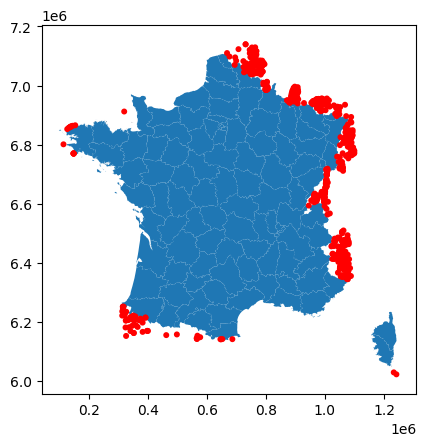

In [17]:
fig, ax = plt.subplots()
departments.plot(ax=ax)
sufosat[sufosat.isna().sum(axis=1) > 0].buffer(10000).plot(ax=ax, color="red")

For now, out-of-simplicity, let's just ignore these clear cuts...


In [23]:
sufosat = sufosat.dropna().copy()
sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee
10172,2024-02-05,2024-08-03,180,530,44.457672,"MULTIPOLYGON (((400459.673 6398666.976, 400450...",0.000000,0.000000,33,33029
10563,2024-03-24,2024-08-03,132,321,38.320393,"MULTIPOLYGON (((424668.593 6344976.607, 424668...",0.000000,0.000000,40,40149
6427,2024-01-12,2024-08-03,204,493,35.142598,"MULTIPOLYGON (((368631.052 6396178.685, 368629...",35.142598,0.401837,33,33529
6614,2024-03-24,2024-08-03,132,382,30.446350,"MULTIPOLYGON (((383863.067 6413192.661, 383853...",0.000000,0.000000,33,33229
6169,2024-04-22,2024-08-02,102,408,28.212858,"MULTIPOLYGON (((375259.394 6342365.243, 375249...",0.000000,0.000000,40,40210
...,...,...,...,...,...,...,...,...,...,...
7130,2024-07-05,2024-08-02,28,8,0.531001,"MULTIPOLYGON (((479005.049 6455355.029, 479005...",0.000000,0.000000,24,24511
2722,2024-03-21,2024-06-13,84,13,0.500588,"MULTIPOLYGON (((712629.07 6919231.836, 712629....",0.000000,0.000000,02,02672
2798,2024-03-13,2024-07-16,125,21,0.585844,"MULTIPOLYGON (((734346.925 6761598.024, 734346...",0.000000,0.000000,89,89075
4357,2024-03-07,2024-04-24,48,8,0.518912,"MULTIPOLYGON (((530277.541 6702834.477, 530268...",0.518912,0.000000,37,37233


### Add centroïd & representation point information

The centroid is the geometric center of a shape, but it may lie outside the geometry, while the representative point is always inside the geometry and is used when you need a point guaranteed to be within the shape.


In [24]:
# TODO: This should have be done in a prior data preparation step

# I don't simply do `sufosat["centroid"] = sufosat.geometry` because `gdf.to_file()`
# doesn't support multiple geometries
sufosat["centroid_x"] = sufosat.geometry.centroid.x
sufosat["centroid_y"] = sufosat.geometry.centroid.y
sufosat["representative_point_x"] = sufosat.geometry.representative_point().x
sufosat["representative_point_y"] = sufosat.geometry.representative_point().y

## Abusive clear cuts


In [25]:
# Reorder columns
sufosat = sufosat[
    [
        "date_min",
        "date_max",
        "days_delta",
        "clear_cut_group_size",
        "area_ha",
        "natura2000_area_ha",
        "slope30_area_ha",
        "department_code_insee",
        "city_code_insee",
        "centroid_x",
        "centroid_y",
        "representative_point_x",
        "representative_point_y",
        "geometry",
    ]
]

# Sort by date
sufosat = sufosat.sort_values("date_min").reset_index(drop=True)

sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry
0,2024-01-01,2024-06-11,162,27,1.451144,0.00000,0.000000,81,81062,656682.972654,6.287601e+06,656678.271686,6.287607e+06,"MULTIPOLYGON (((656701.555 6287475.712, 656701..."
1,2024-01-01,2024-02-12,42,23,1.052884,0.00000,0.000000,66,66065,693650.551051,6.166647e+06,693590.835170,6.166602e+06,"MULTIPOLYGON (((693615.516 6166652.418, 693615..."
2,2024-01-01,2024-02-06,36,8,0.606112,0.00000,0.000000,84,84097,854145.531616,6.364398e+06,854122.110457,6.364382e+06,"MULTIPOLYGON (((854193.253 6364404.281, 854202..."
3,2024-01-01,2024-03-01,60,18,0.922894,0.00000,0.000000,66,66208,694737.352093,6.172374e+06,694758.101038,6.172378e+06,"MULTIPOLYGON (((694654.767 6172407.889, 694654..."
4,2024-01-01,2024-01-13,12,7,0.711696,0.00000,0.000000,34,34176,783196.531396,6.281713e+06,783193.693600,6.281762e+06,"MULTIPOLYGON (((783224.502 6281626.718, 783224..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10900,2024-08-04,2024-08-04,0,1,1.269001,0.00000,0.003268,69D,69130,809020.382833,6.550836e+06,809020.747758,6.550839e+06,"MULTIPOLYGON (((808950.141 6550898.506, 808950..."
10901,2024-08-04,2024-08-04,0,1,1.132291,0.00000,0.022786,71,71059,814336.998155,6.633582e+06,814343.452188,6.633588e+06,"MULTIPOLYGON (((814406.118 6633660.062, 814406..."
10902,2024-08-04,2024-08-04,0,1,0.523002,0.00000,0.000000,42,42120,774769.893570,6.544815e+06,774767.832144,6.544808e+06,"MULTIPOLYGON (((774804.206 6544868.596, 774804..."
10903,2024-08-04,2024-08-04,0,1,0.679622,0.00000,0.000000,69D,69261,816582.513639,6.564779e+06,816570.558232,6.564775e+06,"MULTIPOLYGON (((816583.742 6564810.989, 816583..."


In [26]:
# Abusive clear cuts with an area >= 10 hectares
sufosat[sufosat["area_ha"] >= 10]

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry
46,2024-01-01,2024-07-29,210,226,15.066794,0.000000,3.011971,81,81163,654175.605604,6.263682e+06,654299.669253,6.263945e+06,"MULTIPOLYGON (((654182.025 6263780.205, 654182..."
112,2024-01-02,2024-04-01,90,299,21.656049,21.656049,0.000000,13,13004,821862.391841,6.289735e+06,821873.524812,6.289462e+06,"MULTIPOLYGON (((821753.681 6289661.137, 821753..."
150,2024-01-04,2024-08-03,212,191,13.479794,0.000000,0.000000,33,33042,400729.300316,6.390963e+06,400655.845825,6.390916e+06,"MULTIPOLYGON (((400515.95 6390681.534, 400516...."
163,2024-01-05,2024-07-27,204,218,19.181661,0.000000,0.000000,40,40310,356878.378809,6.304382e+06,356820.980691,6.304436e+06,"MULTIPOLYGON (((356552.784 6304484.515, 356553..."
224,2024-01-07,2024-06-11,156,141,11.767085,0.000382,0.000000,47,47233,468157.612027,6.386333e+06,468194.373785,6.386306e+06,"MULTIPOLYGON (((468417.083 6386141.93, 468417...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,2024-06-15,2024-08-03,49,119,11.643299,0.390185,0.000000,79,79316,462670.945617,6.599309e+06,462686.085063,6.599336e+06,"MULTIPOLYGON (((462466.889 6599030.176, 462466..."
9060,2024-06-15,2024-08-02,48,33,10.949711,0.000000,0.000000,24,24399,490592.891880,6.445539e+06,490583.693838,6.445559e+06,"MULTIPOLYGON (((490353.961 6445604.284, 490344..."
9259,2024-06-21,2024-08-03,43,87,10.500394,0.000000,0.000000,40,40278,367654.343340,6.351940e+06,367589.167423,6.351932e+06,"MULTIPOLYGON (((367544.441 6351902.694, 367525..."
9534,2024-06-27,2024-08-03,37,78,12.596832,12.596832,0.000000,33,33207,433173.477041,6.431813e+06,433177.243662,6.431824e+06,"MULTIPOLYGON (((432921.421 6431708.372, 432920..."


In [27]:
# Abusive clear cuts within a Natura2000 area
(
    len(sufosat[sufosat["natura2000_area_ha"] >= 0.5]),
    len(sufosat[sufosat["natura2000_area_ha"] >= 1]),
    len(sufosat[sufosat["natura2000_area_ha"] >= 2]),
)

(1133, 519, 193)

In [28]:
# Abusive clear cuts with a slope >= 30%
(
    len(sufosat[sufosat["slope30_area_ha"] >= 0.5]),
    len(sufosat[sufosat["slope30_area_ha"] >= 1]),
    len(sufosat[sufosat["slope30_area_ha"] >= 2]),
)

(450, 181, 57)

In [29]:
# Abusive clear cuts with all criterias
abusive_clear_cuts: gpd.GeoDataFrame = sufosat[
    (sufosat["area_ha"] >= 10)
    | (sufosat["natura2000_area_ha"] >= 2)
    | (sufosat["slope30_area_ha"] >= 2)
]
abusive_clear_cuts

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry
46,2024-01-01,2024-07-29,210,226,15.066794,0.000000,3.011971,81,81163,654175.605604,6.263682e+06,654299.669253,6.263945e+06,"MULTIPOLYGON (((654182.025 6263780.205, 654182..."
83,2024-01-02,2024-02-19,48,23,2.388063,2.388063,1.587221,30,30045,787413.311190,6.357691e+06,787265.500367,6.357787e+06,"MULTIPOLYGON (((787376.363 6357724.191, 787357..."
104,2024-01-02,2024-03-02,60,43,2.973299,2.973299,0.000000,13,13097,854413.715365,6.283468e+06,854434.527618,6.283463e+06,"MULTIPOLYGON (((854310.569 6283384.677, 854310..."
111,2024-01-02,2024-08-05,216,71,6.054324,6.054324,0.000000,15,15204,644166.058184,6.427657e+06,644164.693320,6.427660e+06,"MULTIPOLYGON (((644046.22 6427631.19, 644036.7..."
112,2024-01-02,2024-04-01,90,299,21.656049,21.656049,0.000000,13,13004,821862.391841,6.289735e+06,821873.524812,6.289462e+06,"MULTIPOLYGON (((821753.681 6289661.137, 821753..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10398,2024-07-16,2024-07-29,13,27,2.828012,2.828012,0.000000,36,36124,567029.955525,6.629901e+06,567033.861295,6.629924e+06,"MULTIPOLYGON (((566952.398 6629965.339, 566952..."
10431,2024-07-16,2024-08-02,17,5,3.730226,3.730226,0.000000,28,28164,611715.078446,6.793410e+06,611705.945612,6.793391e+06,"MULTIPOLYGON (((611544.591 6793318.295, 611580..."
10581,2024-07-21,2024-08-02,12,10,2.079933,2.079933,0.000000,61,61150,506993.296131,6.849330e+06,507041.425650,6.849324e+06,"MULTIPOLYGON (((507069.934 6849252.297, 507052..."
10629,2024-07-22,2024-08-03,12,5,3.056744,3.056744,0.000000,33,33255,430398.157982,6.354270e+06,430406.862394,6.354235e+06,"MULTIPOLYGON (((430367.687 6354103.764, 430369..."


## Save the result to S3

We leave the criterias filtering up to the consumers of the file


In [30]:
# Save the result to disk
# index=False because we don't need to keep the group id
Path("../data/abusive_clear_cuts/").mkdir(exist_ok=True, parents=True)
sufosat.to_file("../data/abusive_clear_cuts/abusive_clear_cuts_2024.fgb", index=False)

In [31]:
!aws s3 cp ../data/abusive_clear_cuts/abusive_clear_cuts_2024.fgb s3://brigade-coupe-rase-s3/analytics/data/abusive_clear_cuts/abusive_clear_cuts_2024.fgb --profile d4g-s13-brigade-coupes-rases

upload: ../data/abusive_clear_cuts/abusive_clear_cuts_2024.fgb to s3://brigade-coupe-rase-s3/analytics/data/abusive_clear_cuts/abusive_clear_cuts_2024.fgb


In [32]:
!aws s3 ls s3://brigade-coupe-rase-s3/analytics/ --recursive --profile d4g-s13-brigade-coupes-rases

2025-02-25 09:31:33   96946219 analytics/data
2025-03-02 19:58:22  114393184 analytics/data/abusive_clear_cuts/abusive_clear_cuts_2024.fgb
2025-03-02 18:53:00  517567704 analytics/data/cadastre/cadastre_france_cities.fgb
2025-03-02 18:53:03   28085888 analytics/data/cadastre/cadastre_france_departments.fgb
2025-02-21 18:43:11  558882864 analytics/data/ign/bdalti25/slope_gte_30.fgb
2025-02-21 18:42:55   32993275 analytics/data/ign/bdalti25/slope_gte_30.tif
2025-02-25 09:58:17   96946219 analytics/data/sufosat/mosaics_tropisco_warnings_france_date.tif
2025-02-25 10:08:57   76601154 analytics/data/sufosat/mosaics_tropisco_warnings_france_prob.tif
2025-02-21 13:26:51  120737768 analytics/data/sufosat/sufosat_clear_cuts_2024.fgb
